# 1. import all the necessary libraries and read the data using pandas DataFrame.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV files into dataframes
orders = pd.read_csv(r'C:\Users\nzen4\Downloads\Python\orders.csv')
order_details = pd.read_csv(r'C:\Users\nzen4\Downloads\Python\order_details.csv')
pizzas = pd.read_csv(r'C:\Users\nzen4\Downloads\Python\pizzas.csv')


In [2]:
orders.head(0)

,order_id,date,time


In [3]:
def inspect_data(order_details, col=None, n_rows=5):
    #check data shape
    
    print(f'data shape: {order_details.shape}')
          
    # column definition 
    if col is None:
          col =order_details.columns
    
    # check head data using function to display to view dataframe
    display(order_details[col].head(n_rows))

In [4]:
inspect_data(orders, col=['order_id', 'date', 'time'], n_rows=3)

data shape: (21350, 3)


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28


In [5]:
order_details.head(0)

,order_details_id,order_id,pizza_id,quantity


In [6]:
def inspect_data(order_details, col=None, n_rows=5):
    #check data shape
    
    print(f'data shape: {order_details.shape}')
          
    # column definition 
    if col is None:
          col =order_details.columns
    
    # check head data using function to display to view dataframe
    display(order_details[col].head(n_rows))

In [7]:
inspect_data(order_details, col=['order_details_id','order_id','pizza_id','quantity'], n_rows=3)

data shape: (48620, 4)


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1


In [8]:
pizzas.head(0)

,pizza_id,pizza_type_id,size,price


In [9]:
def inspect_data(pizzas, col=None, n_rows=5):
    #check data shape
    
    print(f'data shape: {pizzas.shape}')
          
    # column definition 
    if col is None:
          col =pizzas.columns
    
    # check head data using function to display to view dataframe
    display(pizzas[col].head(n_rows))

In [10]:
inspect_data(pizzas, col=['pizza_id','pizza_type_id','size','price'], n_rows=3)

data shape: (96, 4)


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75


# 2. Create a new column with the year-month format (YYYY-MM) from the "orders" table, and create a line chart that shows the count of order_id for each year-month. Provide a summary of the month with the highest number of orders.

In [11]:
orders['date'] = pd.to_datetime(orders['date'])#Cange data type to date
order_details['year_month'] = orders['date'].dt.strftime('%Y-%m') # adding column year_month to table order_details
order_details.head()


,order_details_id,order_id,pizza_id,quantity,year_month
0,1,1,hawaiian_m,1,2015-01
1,2,2,classic_dlx_m,1,2015-01
2,3,2,five_cheese_l,1,2015-01
3,4,2,ital_supr_l,1,2015-01
4,5,2,mexicana_m,1,2015-01


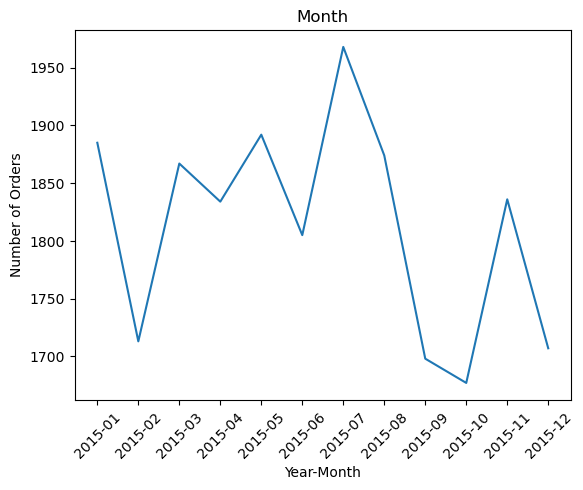

In [12]:
# Group the data by 'year_month' and calculate the sum of 'quantity'
monthly_quantity = order_details.groupby('year_month')['quantity'].sum()

# Create the line chart
plt.plot(monthly_quantity.index, monthly_quantity.values)
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.title('Month')
plt.xticks(rotation=45)
plt.show()

In [13]:
monthly_quantity.max()

1968

Bulan juli merupakan bulan dengan pesanan tertinggi yaitu sebanyak 1968.

Summary : The month of July has the highest number of orders, which is 1968 orders.

# 3. Create a dataset based on hours (hourly) from the "orders" table and a bar chart to identify the busiest hours. Provide a summary of the results in markdown format.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '9'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '13'),
  Text(5, 0, '14'),
  Text(6, 0, '15'),
  Text(7, 0, '16'),
  Text(8, 0, '17'),
  Text(9, 0, '18'),
  Text(10, 0, '19'),
  Text(11, 0, '20'),
  Text(12, 0, '21'),
  Text(13, 0, '22'),
  Text(14, 0, '23')])

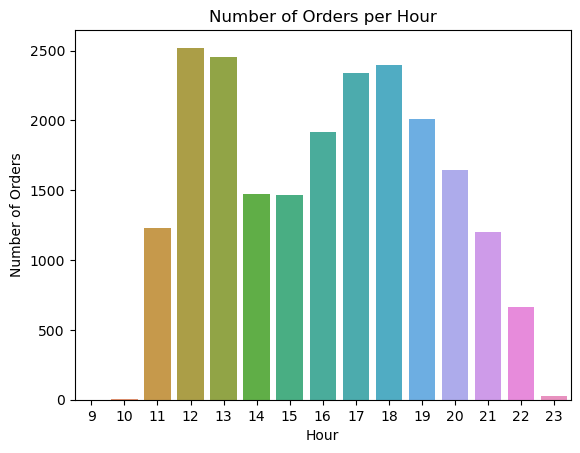

In [14]:
# Hitung jumlah pesanan berdasarkan jam
orders['hour'] = pd.to_datetime(orders['time']).dt.hour
hourly_orders = orders['order_id'].groupby(orders['hour']).count()

# Tampilkan bar chart menggunakan Seaborn
sns.barplot(x=hourly_orders.index, y=hourly_orders.values)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour')
plt.xticks(rotation=0)


Jam tersibuk adalah pada pukul jam 12 siang dengan pesanan sebanyak :  2520  kali.

Summary : The busiest hour is at 12 PM with a total of 2520 orders.

# 4. Join the "order_details" table with the "pizzas" table, and create a bar plot that displays the total quantity for each pizza_type_id, sorted in descending order. Generate a summary of the results in Markdown format.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'classic_dlx'),
  Text(1, 0, 'bbq_ckn'),
  Text(2, 0, 'hawaiian'),
  Text(3, 0, 'pepperoni'),
  Text(4, 0, 'thai_ckn'),
  Text(5, 0, 'cali_ckn'),
  Text(6, 0, 'sicilian'),
  Text(7, 0, 'spicy_ital'),
  Text(8, 0, 'southw_ckn'),
  Text(9, 0, 'big_meat'),
  Text(10, 0, 'four_cheese'),
  Text(11, 0, 'ital_supr'),
  Text(12, 0, 'veggie_veg'),
  Text(13, 0, 'mexicana'),
  Text(14, 0, 'napolitana'),
  Text(15, 0, 'prsc_argla'),
  Text(16, 0, 'peppr_salami'),
  Text(17, 0, 'spinach_fet'),
  Text(18, 0, 'ital_cpcllo'),
  Text(19, 0, 'the_greek'),
  Text(20, 0, 'five_cheese'),
  Text(21, 0, 'pep_msh_pep'),
  Text(22, 0, 'green_garden'),
  Text(23, 0, 'ckn_alfredo'),
  Text(24, 0, 'ital_veggie'),
  Text(25, 0, 'ckn_pesto'),
  Text(26, 0, 'spin_pesto'),
  Text(27, 0, 'soppressata'),
  Text(28, 0, 'spinach_supr'),
  Text(29, 0, 'calabrese'),

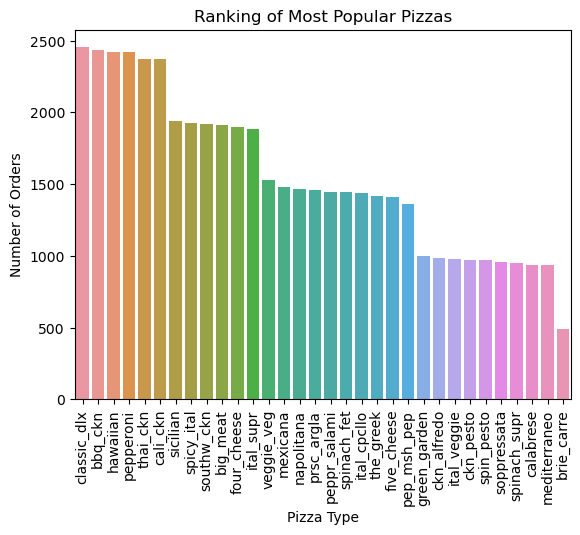

In [15]:
# merge table order_detail and pizzas
merged_data = order_details.merge(pizzas, on='pizza_id')

# counting the quantity based on pizza type
pizza_type_quantity = merged_data.groupby('pizza_type_id')['quantity'].sum()

# creating bar chart
sns.barplot(x=pizza_type_quantity.index, y=pizza_type_quantity.values, order=pizza_type_quantity.sort_values(ascending=False).index)
plt.xlabel('Pizza Type')
plt.ylabel('Number of Orders')
plt.title('Ranking of Most Popular Pizzas')
plt.xticks(rotation='vertical')



In [16]:
max_quantity = pizza_type_quantity.max()
max_quantity

2453

Berdasarkan data diatas Pizza type clasic_dlx merupakan Pizza dengan pesanan terbanyak yaitu 2.453 kali pesanan.

Summary : Based on the data above, the pizza type "clasic_dlx" has the highest number of orders, which is 2,453 orders.

# 5. Calculate the revenue for each pizza size using the formula revenue = quantity x price, and create a pie chart to display the percentage contribution of each pizza size. Generate a summary of the results in Markdown format.

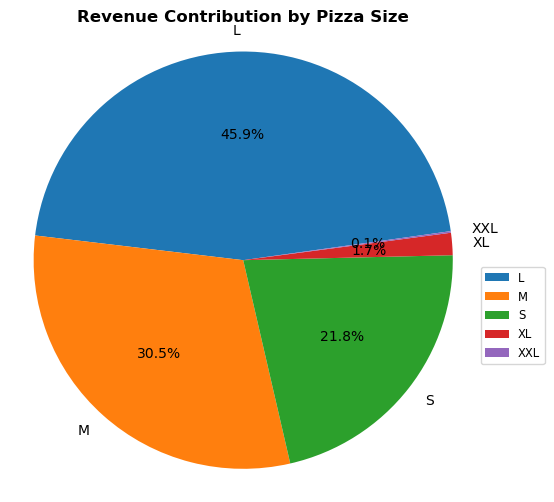

In [17]:
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']

size_revenue = merged_data.groupby('size')['revenue'].sum()

plt.figure(figsize=(6, 6))
plt.pie(size_revenue, labels=size_revenue.index, autopct='%1.1f%%', startangle=8)
plt.axis('equal')
plt.title('Revenue Contribution by Pizza Size',weight = 'bold')

plt.legend(bbox_to_anchor=(1, 0.5), fontsize='small') 



Pizza dengan ukuran L merupakan pizza dengan kontribusi revenue terbanyak dengan perolehan 45.9 %

Summary : The pizza with size "L" contributes the highest revenue with a share of 45.9%.

# 6. Calculate the revenue for each pizza_type using the formula revenue = quantity x price, and create a bar plot of the total revenue provided by each pizza_type, sorted in descending order from highest to lowest revenue.

In [18]:
# Merge order_details with pizzas based on pizza_id
join_pizzas_order_details =  pd.merge(pizzas, order_details, on='pizza_id',how = 'left')


In [19]:
# Calculate revenue for each pizza_type
join_pizzas_order_details['revenue'] = join_pizzas_order_details['quantity'] * join_pizzas_order_details['price']

In [20]:
# Calculate total revenue for each pizza_type
pizza_type_revenue = join_pizzas_order_details.groupby('pizza_type_id')['revenue'].sum().sort_values(ascending=False)


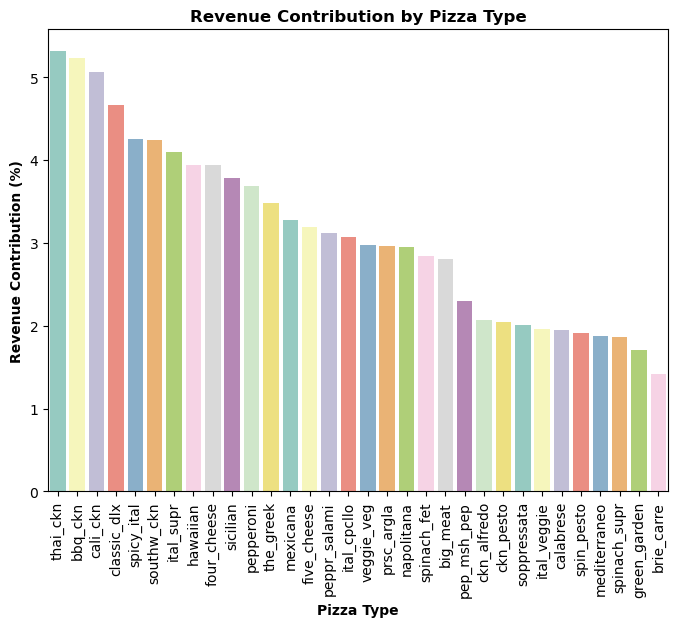

In [21]:
# Calculate the percentage of total revenue for each pizza_type
total_revenue = pizza_type_revenue.sum()
percentage_revenue = (pizza_type_revenue / total_revenue) * 100

# Create the bar plot using Seaborn

plt.figure(figsize=(8, 6))
sns.barplot(x=pizza_type_revenue.index, y=percentage_revenue, palette='Set3')
plt.xlabel('Pizza Type',weight = 'bold')
plt.ylabel('Revenue Contribution (%)',weight = 'bold')
plt.title('Revenue Contribution by Pizza Type',weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [22]:
percentage_revenue.describe()

count    32.000000
mean      3.125000
std       1.104800
min       1.416929
25%       2.033691
50%       3.024280
75%       3.945368
max       5.310719
Name: revenue, dtype: float64

In [23]:
pizza_type_revenue.describe()

count       32.000000
mean     25558.126563
std       9035.714810
min      11588.500000
25%      16632.750000
50%      24734.375000
75%      32267.587500
max      43434.250000
Name: revenue, dtype: float64

Berdasarkan data bar chart di atas Pizza type thai_ckn merupakan pizza tipe dengan kontribusi tertinggi dengan persentase 5,3 
( USD 43.434 ),  kemudian  pizza tipe brie_care merupakan pizza tipe dengan kontribusi terendah dengan persentase 1,4( USD 11.588 )

Summary : The pizza type "thai_ckn" has the highest contribution with a percentage of 5.3 % (USD 43,434 ) while the pizza type "brie_care" has the lowest contribution with a percentage of 1.4 % ( USD 11,588).

# Summary of Data Analysis Results:

1. Monthly Order Trends: The month of July recorded the highest number of orders, indicating a peak in customer demand.

2. Busiest Hour of the Day: The busiest hour was observed to be 12 PM (noon), with a significant number of orders placed during that time.

3. Popular Pizza Types: "Clasic_dlx" emerged as the most popular pizza type based on the number of orders received.

4. Revenue Contribution by Pizza Size: The size "L" generated the highest revenue, accounting for 45.9% of the total revenue. This emphasizes the importance of offering larger-sized pizzas to maximize profitability.

5. Pizza Type Revenue Breakdown: Among the pizza types, "Thai_ckn" stood out as the top revenue contributor, accounting for 5.3% of the total revenue, equivalent to $43,434. On the other hand, "Brie_care" had the lowest revenue contribution, making up only 1.4 (USD11,588) of the total.

These insights provide valuable information for optimizing operations, menu planning, and marketing strategies. By leveraging this data, we can make informed decisions to enhance customer satisfaction, improve efficiency, and drive business growth.

